Objective:the purpose of this analysis is to make up a prediction model where 
we will be able to predict whether a recommendation is positive or negative.

In [1]:
%config IPCompleter.greedy=True

In [2]:
import os
import pandas as pd
import sqlite3#as we have data in sqlite version
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
import sys
print(sys.executable)

C:\Users\Aman\Anaconda3\python.exe


Now after importing basic library it's time to fetch the data

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
#connecting to the database through sqlite
con=sqlite3.connect('D:/DataScience_Project/Assignments_AFR_2018/database.sqlite')

In [6]:
#fetch data through pandas
amznrvw=pd.read_sql_query('''
SELECT*
FROM Reviews
''',con)

In [7]:
amznrvw.head(10).T

,0,1,2,3,4,5,6,7,8,9
Id,1,2,3,4,5,6,7,8,9,10
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K,B006K2ZZ7K,B006K2ZZ7K,B006K2ZZ7K,B000E7L2R4,B00171APVA
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T,ADT0SRK1MGOEU,A1SP2KVKFXXRU1,A3JRGQVEQN31IQ,A1MZYO9TZK0BBI,A21BT40VZCCYT4
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir""",Twoapennything,David C. Sullivan,Pamela G. Williams,R. James,Carol A. Reed
HelpfulnessNumerator,1,0,1,3,0,0,0,0,1,0
HelpfulnessDenominator,1,0,1,3,0,0,0,0,1,0
Score,5,1,4,2,5,4,5,5,5,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600,1342051200,1340150400,1336003200,1322006400,1351209600
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy,Nice Taffy,Great! Just as good as the expensive brands!,"Wonderful, tasty taffy",Yay Barley,Healthy Dog Food
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...,I got a wild hair for taffy and ordered this f...,This saltwater taffy had great flavors and was...,This taffy is so good. It is very soft and ch...,Right now I'm mostly just sprouting this so my...,This is a very healthy dog food. Good for thei...


In [8]:
amznrvw.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [9]:
#checking null values
amznrvw.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

so it seems no null value present in dataset lets proceed further

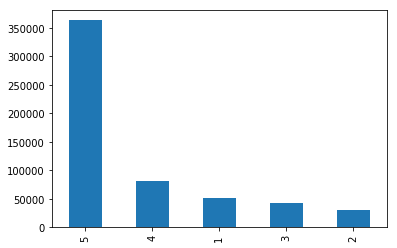

In [10]:
#lets plot the graph to understand the score value count
ax=amznrvw.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png")

it's look like we have more reviews with 5 star rating

In [11]:
amznrvw.shape

(568454, 10)

To determine the approximate polarity (+/-) of the review a rating of 4 or 5 can be cosnidered as a positive review. a rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis

In [12]:
amznrvw['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [13]:
amznrvw1=amznrvw[amznrvw['Score']!=3]#removing score =3 from data

In [14]:
#rename for better understanding of helpfulness
amznrvw1=amznrvw1.rename(columns={'HelpfulnessNumerator':'Helpfulvote','HelpfulnessDenominator':'Totalvote'})

In [15]:
amznrvw1.head(2).T

,0,1
Id,1,2
ProductId,B001E4KFG0,B00813GRG4
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK
ProfileName,delmartian,dll pa
Helpfulvote,1,0
Totalvote,1,0
Score,5,1
Time,1303862400,1346976000
Summary,Good Quality Dog Food,Not as Advertised
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...


In [16]:
amznrvw1=amznrvw1[amznrvw1.Helpfulvote<=amznrvw1.Totalvote]

In [17]:
#add two column Sentiments and Helpfulness to describe the data better 
amznrvw1["Sentiment"] = amznrvw1["Score"].apply(lambda score: "positive" if score > 3 else "negative")
amznrvw1["Usefulness"] = (amznrvw1['Helpfulvote']/amznrvw1['Totalvote']).apply(lambda n: "useful" if n > 0.8 else "useless")


In [18]:
#Deduplication of entries
flamznrvw=amznrvw1.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
flamznrvw.shape

(364171, 12)

In [19]:
flamznrvw.head(2).T

,0,1
Id,1,2
ProductId,B001E4KFG0,B00813GRG4
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK
ProfileName,delmartian,dll pa
Helpfulvote,1,0
Totalvote,1,0
Score,5,1
Time,1303862400,1346976000
Summary,Good Quality Dog Food,Not as Advertised
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...


In [20]:
flamznrvw['Sentiment'].value_counts()

positive    307061
negative     57110
Name: Sentiment, dtype: int64

In [21]:
#fetching importnat column as per analysis point of view
rvwdata=flamznrvw[['Score','Summary','Helpfulvote','Totalvote','Sentiment','Usefulness']]

In [22]:
rvwdata.head(10)

,Score,Summary,Helpfulvote,Totalvote,Sentiment,Usefulness
0,5,Good Quality Dog Food,1,1,positive,useful
1,1,Not as Advertised,0,0,negative,useless
2,4,"""Delight"" says it all",1,1,positive,useful
3,2,Cough Medicine,3,3,negative,useful
4,5,Great taffy,0,0,positive,useless
5,4,Nice Taffy,0,0,positive,useless
6,5,Great! Just as good as the expensive brands!,0,0,positive,useless
7,5,"Wonderful, tasty taffy",0,0,positive,useless
8,5,Yay Barley,1,1,positive,useful
9,5,Healthy Dog Food,0,0,positive,useless


Extracting feature from text data 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
import nltk

In [24]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

In [25]:
rvwdata["Summary_Clean"] = rvwdata["Summary"].apply(cleanup)

C:\Users\Aman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [27]:
#train and test split data
train, test = train_test_split(rvwdata, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

291336 items in training data, 72835 in test data


In [28]:
from wordcloud import WordCloud,STOPWORDS

# To cleanup stop words, add stop_words = STOPWORDS
# But it seems to function better without it

count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Sentiment"]
y_test = test["Sentiment"]

prediction = dict()

In [30]:
import matplotlib as mpl
stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

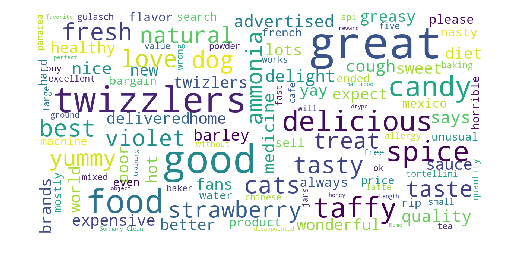

In [31]:
show_wordcloud(rvwdata["Summary_Clean"])

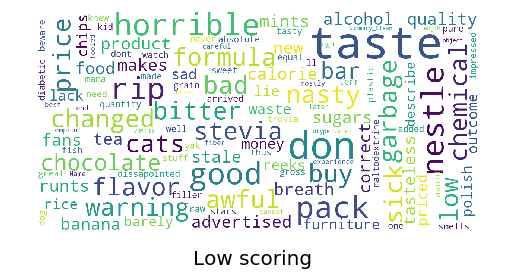

In [32]:
show_wordcloud(rvwdata[rvwdata.Score == 1]["Summary_Clean"], title = "Low scoring")

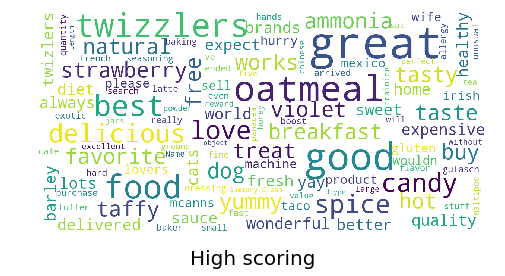

In [33]:
show_wordcloud(rvwdata[rvwdata.Score == 5]["Summary_Clean"], title = "High scoring")

Applying multinomial naive bayes learning method

In [34]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

Applying Bernoulli Naive Bayes learning method

In [35]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

Applying Logistic Regression Method

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'Classifiers comparaison with ROC')

(-0.1, 1.2)

(-0.1, 1.2)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

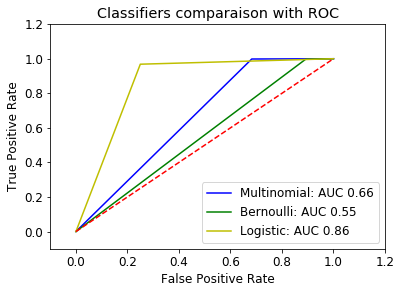

In [43]:
import numpy as np

def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [44]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

              precision    recall  f1-score   support

    positive       0.81      0.75      0.78     11378
    negative       0.95      0.97      0.96     61457

   micro avg       0.93      0.93      0.93     72835
   macro avg       0.88      0.86      0.87     72835
weighted avg       0.93      0.93      0.93     72835



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

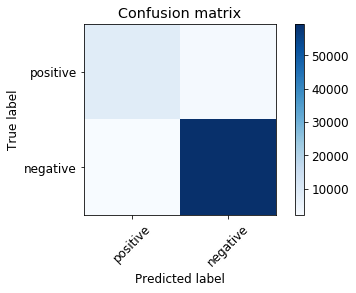

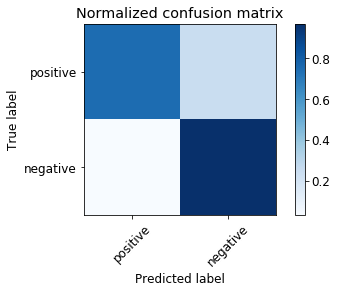

In [45]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

In [46]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logreg_result.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs.sort_values(by='coef')

,feature,coef
937132,worst,-42.353859
409574,horrible,-32.895889
952914,yuck,-32.708543
60037,awful,-32.101648
795551,terrible,-31.496752
570100,not,-30.271937
552635,nasty,-26.345092
747869,stale,-26.155901
937012,worse,-25.055169
220675,disgusting,-24.587504


In [47]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The food was delicious, it smelled great and the taste was awesome")
test_sample(logreg, "The whole experience was horrible. The smell was so bad that it literally made me sick.")
test_sample(logreg, "The food was ok, I guess. The smell wasn't very good, but the taste was ok.")

Sample estimated as POSITIVE: negative prob 0.001020, positive prob 0.998980
Sample estimated as NEGATIVE: negative prob 1.000000, positive prob 0.000000
Sample estimated as POSITIVE: negative prob 0.458133, positive prob 0.541867
